In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from LinearRegressionUsingOLSGD.heartCase.LinearRegression   import OLSClassifier

# 1. Dataset

In [2]:
df = pd.read_csv(f"heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.duplicated().sum()

np.int64(723)

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.shape

(302, 14)

In [8]:
df.shape

(302, 14)

In [9]:
X = df.drop(columns=["target"])
y = df["target"]

In [10]:
np.random.seed(42)

indices = np.random.permutation(len(df))

train_size = int(0.8 * len(df))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]

y_train = y.iloc[train_idx]
y_test = y.iloc[test_idx]

In [11]:
def remove_outliers_zscore(X, y, threshold=3):
    mean = X.mean(axis=0)           # Rata-rata tiap fitur
    std  = X.std(axis=0)            # Standar deviasi tiap fitur

    z = np.abs((X - mean) / std)    # Hitung nilai Z-score
    mask = (z < threshold).all(axis=1)  # Ambil data tanpa outlier

    return X[mask], y[mask]

# Terapkan penghapusan outlier
X, y = remove_outliers_zscore(X, y)

print("Shape setelah outlier removal:", X.shape)


Shape setelah outlier removal: (287, 13)


In [12]:

X_min = X_train.min(axis=0)        # Minimum fitur data latih
X_max = X_train.max(axis=0)        # Maksimum fitur data latih
    
X_train = (X_train - X_min) / (X_max - X_min)
X_test  = (X_test  - X_min) / (X_max - X_min)


# 2. EDA

#### 2.1 Grafik

Data target (sakit / tidak sakit) seimbang atau sama banyak. data orang sakit ada sebanyak **51.3%** dan data orang yang tidak sakit ada sebanyak **48.7%**

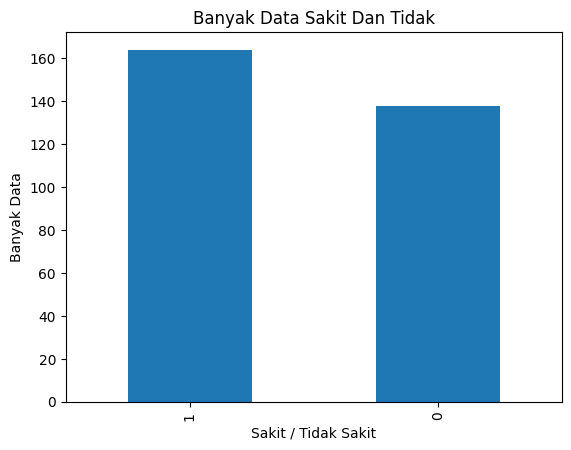

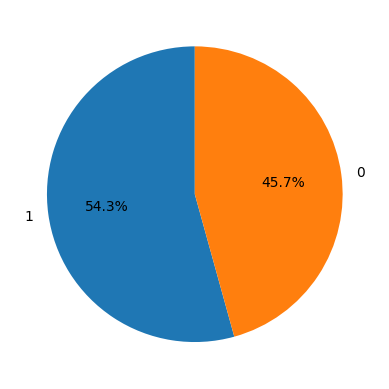

In [13]:
# bar chart
df["target"].value_counts().plot(
    kind="bar",
    title="Banyak Data Sakit Dan Tidak",
    ylabel="Banyak Data",
    xlabel="Sakit / Tidak Sakit"
)

plt.show()


# pie chart
value = df["target"].value_counts()

plt.figure()
plt.pie(
    value,
    labels=value.index,
    autopct="%1.1f%%",
    startangle=90
    )
plt.show()

Tidak ditemukan pola hubungan antara **fbs dan penyakit jantung**

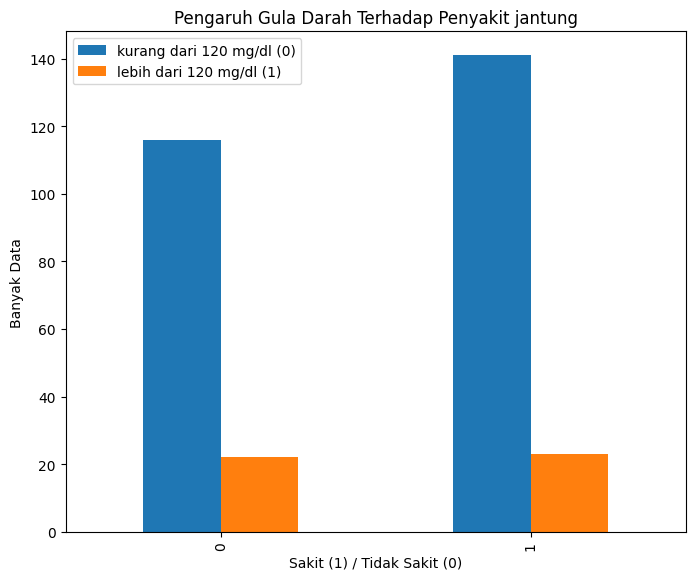

In [14]:
gender_target = df.groupby("target")["fbs"].value_counts().unstack()

gender_target.plot(kind="bar", figsize=[8, 6.5])
plt.title("Pengaruh Gula Darah Terhadap Penyakit jantung")
plt.ylabel("Banyak Data")
plt.xlabel("Sakit (1) / Tidak Sakit (0)")
plt.legend(["kurang dari 120 mg/dl (0)", "lebih dari 120 mg/dl (1)"])
plt.show()

orang dengan tipe **chest pain 0 besar kemungkinan sehat**. sedangkan orang dengan tipe **chest pain 2 besar kemungkinan memiliki penyakit jantung**

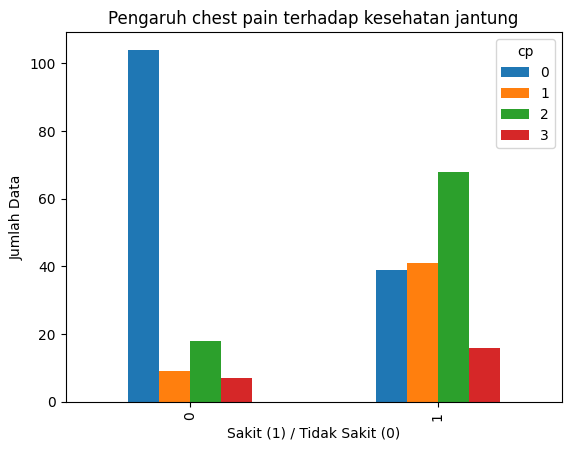

In [15]:
cp_target = df.groupby("target")["cp"].value_counts().unstack()

cp_target.plot(
    kind="bar",
    title="Pengaruh chest pain terhadap kesehatan jantung",
    ylabel="Jumlah Data",
    xlabel="Sakit (1) / Tidak Sakit (0)"
)
plt.show()

# 3. Modelling

Model regresi y = w0+w1.x1+w2.x2+...+w13.x13

In [16]:
from LinearRegressionUsingOLSGD.heartCase.LinearRegression import OLSClassifier


ln = OLSClassifier()
ln.fit(X_train, y_train)
print("Bobot model (coef_):")
print(ln.coef_)

Bobot model (coef_):
[ 0.82957073  0.0732213  -0.18656652  0.30849651 -0.09248321 -0.11189483
  0.00852079  0.09945163  0.22268122 -0.21367789 -0.4938444   0.13987957
 -0.51246192 -0.30302568]


#### 3.4 Confusion Matrix

Confusion matrix digunakan untuk mengevaluasi performa model klasifikasi dengan menghitung jumlah prediksi benar dan salah pada masing-masing kelas. Matriks ini menjadi dasar perhitungan accuracy, precision, recall, dan F1-score.

In [17]:
def confusion_matrix(y_true, y_pred):
    # True Negative: data aktual 0 dan diprediksi 0
    tn = np.sum((y_true == 0) & (y_pred == 0))
    
    # False Positive: data aktual 0 tapi diprediksi 1
    fp = np.sum((y_true == 0) & (y_pred == 1))
    
    # False Negative: data aktual 1 tapi diprediksi 0
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    # True Positive: data aktual 1 dan diprediksi 1
    tp = np.sum((y_true == 1) & (y_pred == 1))

    # Mengembalikan confusion matrix
    return np.array([[tp, fp],
                     [fn, tn]])


##### Model Default

Model pertama dilatih menggunakan parameter default untuk dijadikan baseline. Hasil training dan testing dibandingkan untuk melihat apakah model mengalami overfitting.

In [18]:
ln = OLSClassifier()        # Inisialisasi model dengan parameter default
ln.fit(X_train, y_train)   # Training model

# Prediksi data testing
y_pred = ln.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)

print("data test DEFAULT")
print(cm_test)
print(np.mean(y_test == y_pred))


# Prediksi data training
y_pred_train = ln.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

print("data train DEFAULT")
print(cm_train)
print(np.mean(y_train == y_pred_train))


data test DEFAULT
[[31  8]
 [ 3 19]]
0.819672131147541
data train DEFAULT
[[119  28]
 [ 11  83]]
0.8381742738589212


Akurasi training lebih tinggi dibanding testing → indikasi overfitting ringan, wajar untuk model linear sederhana.

##### Tuning Learning Rate

Learning rate menentukan seberapa besar langkah pembaruan bobot saat training menggunakan gradient descent. Nilai terlalu besar bisa tidak stabil, terlalu kecil membuat model sulit konvergen.

In [19]:
lr = [0.1, 0.01, 0.001, 0.0001]
for learning_rate in lr:
    print("Learning Rate:", learning_rate)
    ln = OLSClassifier(lr=learning_rate, solver='gradient_descent')
    ln.fit(X_train, y_train)
    y_pred = ln.predict(X_test)
    print("Accuracy - TEST")
    print(np.mean(y_pred == y_test))

Learning Rate: 0.1


Accuracy - TEST
0.819672131147541
Learning Rate: 0.01
Accuracy - TEST
0.8032786885245902
Learning Rate: 0.001
Accuracy - TEST
0.7377049180327869
Learning Rate: 0.0001
Accuracy - TEST
0.4426229508196721


lr = 0.1 dan 0.01 → hasil terbaik
lr terlalu kecil → model gagal belajar (akurasi jatuh drastis)

##### Tuning Max Iteration

Max iteration menentukan jumlah maksimum proses pembelajaran. Terlalu sedikit menyebabkan model belum konvergen, terlalu banyak bisa menyebabkan overfitting.

In [20]:
max_iter = [100, 500, 1000, 5000]
for maxiter in max_iter:
    print("Max Iterations:", maxiter)
    ln = OLSClassifier(lr=0.1, max_iter=maxiter, solver='gradient_descent')
    ln.fit(X_train, y_train)
    y_pred = ln.predict(X_test)
    print("Accuracy - TEST")
    print(np.mean(y_pred == y_test))

Max Iterations: 100
Accuracy - TEST
0.8032786885245902
Max Iterations: 500
Accuracy - TEST
0.8360655737704918
Max Iterations: 1000
Accuracy - TEST
0.819672131147541
Max Iterations: 5000
Accuracy - TEST
0.819672131147541


Iterasi ≥ 1000 memberikan hasil stabil
Penambahan iterasi berlebih tidak meningkatkan performa signifikan

##### Pengaruh Intercept

Intercept berfungsi sebagai bias model. Tanpa intercept, model dipaksa melewati titik nol yang seringkali tidak realistis.

In [21]:
print("False")
ln = OLSClassifier(lr=0.01, max_iter=1000, solver='gradient_descent', fit_intercept=False)
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)
print("Accuracy - TEST")
print(np.mean(y_pred == y_test))

print("True")
ln = OLSClassifier(lr=0.01, max_iter=1000, solver='gradient_descent', fit_intercept=True)
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)
print("Accuracy - TEST")
print(np.mean(y_pred == y_test))

False
Accuracy - TEST
0.7868852459016393
True
Accuracy - TEST
0.8032786885245902


Model dengan intercept memberikan hasil lebih baik dan lebih stabil.

##### Regularisasi (Alpha)

Regularisasi digunakan untuk mengontrol kompleksitas model dan mengurangi overfitting.

In [22]:
alpha = [0.0, 0.1, 0.5, 1.0]
for maxiter in alpha:
    print("Max Iterations:", maxiter)
    ln = OLSClassifier(lr=0.01, max_iter=1000, solver='gradient_descent', alpha=maxiter)
    ln.fit(X_train, y_train)
    y_pred = ln.predict(X_test)
    print("Accuracy - TEST")
    print(np.mean(y_pred == y_test))

Max Iterations: 0.0
Accuracy - TEST
0.8032786885245902
Max Iterations: 0.1
Accuracy - TEST
0.8032786885245902
Max Iterations: 0.5
Accuracy - TEST
0.7540983606557377
Max Iterations: 1.0
Accuracy - TEST
0.7868852459016393


Regularisasi ringan masih aman, tetapi alpha besar menurunkan akurasi karena model terlalu dibatasi.

##### Model Terbaik vs Default

Model hasil tuning dibandingkan dengan model default untuk melihat peningkatan performa dan generalisasi.

In [23]:
ln = OLSClassifier(lr=0.01, max_iter=1000, solver='gradient_descent', fit_intercept=True)
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)
print("data test parameter tuning")
print(confusion_matrix(y_test, y_pred))
print(np.mean(y_test == y_pred))

y_pred_train = ln.predict(X_train)
print("data train parameter tuning")
print(confusion_matrix(y_train, y_pred_train))
print(np.mean(y_pred_train == y_train))

ln = OLSClassifier()
ln.fit(X_train, y_train)
y_pred = ln.predict(X_test)
print("data test DEFAULT")
print(confusion_matrix(y_test, y_pred))
print(np.mean(y_pred == y_test))


y_pred_train = ln.predict(X_train)
print("data train DEFAULT")
print(confusion_matrix(y_train, y_pred_train))
print(np.mean(y_pred_train == y_train))  

data test parameter tuning
[[32 10]
 [ 2 17]]
0.8032786885245902
data train parameter tuning
[[112  26]
 [ 18  85]]
0.8174273858921162
data test DEFAULT
[[31  8]
 [ 3 19]]
0.819672131147541
data train DEFAULT
[[119  28]
 [ 11  83]]
0.8381742738589212


Model tuning lebih seimbang
Model default cenderung overfitting

##### Prediksi Data Baru

Model digunakan untuk memprediksi satu data pasien baru yang telah dinormalisasi.

In [24]:
x_baru = [70,1,2,160,269,0,1,112,1,2.9,1,1,3]

X_barunorm = (np.array(x_baru) - X_min) / (X_max - X_min)
print(ln.predict([X_barunorm]))
print(ln.predict_proba([X_barunorm]))
print(ln.predict_percentage([X_barunorm]))

[0]
[[0.88996801 0.11003199]]
88.99


In [25]:
ln.predict([[70,1,2,160,269,0,1,112,1,2.9,1,1,3]])

array([0])

In [26]:
ln.predict_proba([[70,1,2,160,269,0,1,112,1,2.9,1,1,3]])

array([[1., 0.]])

##### Evaluasi Akhir Model

Evaluasi akhir dilakukan menggunakan accuracy, precision, recall, dan F1-score untuk menilai performa model secara menyeluruh.

In [27]:
def classification_report(cm):
    TN, FP = cm[0]
    FN, TP = cm[1]

    accuracy  = (TP + TN) / cm.sum()
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall    = TP / (TP + FN) if (TP + FN) else 0
    f1        = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    return accuracy, precision, recall, f1


In [28]:
# Hitung metrik TRAIN
acc_tr, prec_tr, rec_tr, f1_tr = classification_report(cm_train)

# Hitung metrik TEST
acc_te, prec_te, rec_te, f1_te = classification_report(cm_test)

print("\n=== METRIK TRAIN ===")
print("Accuracy :", acc_tr)
print("Precision:", prec_tr)
print("Recall   :", rec_tr)
print("F1-score :", f1_tr)

print("\n=== METRIK TEST ===")
print("Accuracy :", acc_te)
print("Precision:", prec_te)
print("Recall   :", rec_te)
print("F1-score :", f1_te)



=== METRIK TRAIN ===
Accuracy : 0.8381742738589212
Precision: 0.7477477477477478
Recall   : 0.8829787234042553
F1-score : 0.8097560975609756

=== METRIK TEST ===
Accuracy : 0.819672131147541
Precision: 0.7037037037037037
Recall   : 0.8636363636363636
F1-score : 0.7755102040816326


In [29]:
# import tkinter as tk
# from tkinter import ttk
# import numpy as np
# import pandas as pd

# df = pd.read_csv("heart.csv").drop(columns=["target"])
# def normalize(x):
#     return(x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))


# def predict_btn():
#     input_age_values = float(input_age.get())

#     if dropdown_sex.get() == "Laki-Laki":
#         dropdown_sex_value = 1
#     elif dropdown_sex.get() == "Perempuan":
#         dropdown_sex_value = 0

#     input_cp_value = int(input_cp.get())
#     input_trestbps_value = int(input_trestbps.get())
#     input_chol_value = int(input_chol.get())
    
#     if dropdown_fbs.get() == "yes":
#         dropdown_fbs_value = 1
#     elif dropdown_fbs.get() == "no":
#         dropdown_fbs_value = 0

#     input_restecg_value = int(input_restecg.get())
#     input_thalach_value = int(input_thalach.get())
#     input_exang_value = int(input_exang.get())
#     input_oldpeak_value = float(input_oldpeak.get())
#     input_slope_value = int(input_slope.get())
#     input_ca_value = int(input_ca.get())
#     input_thal_value = int(input_thal.get())

#     array_input = [input_age_values, dropdown_sex_value, input_cp_value, input_trestbps_value, input_chol_value, dropdown_fbs_value, input_restecg_value, input_thalach_value, input_exang_value, input_oldpeak_value, input_slope_value, input_ca_value, input_thal_value]
#     array_input_norm = (np.array(array_input) - X_min) / (X_max - X_min)
#     array_input_norm = array_input_norm.reshape(1, -1)


#     pred = ln.predict(array_input_norm)[0]
#     if pred == 1:
#         pred = "Dideteksi Sakit Jantung 💔"
#     else:
#         pred = "Anda Dideteksi Sehat 💖"
#     result_predict.config(text=f"Prediksi: {pred}")

#     # print(array_input_norm)


# root = tk.Tk()
# root.title("aplikasi regresi tapi clasifikasi 😭")
# root.geometry("400x500")
# root.resizable(True, True)
# # root.minsize(350, 350)
# # root.maxsize(600, 600)

# # Buat grid fleksibel
# # root.columnconfigure(0, weight=1)

# title = ttk.Label(root, text="Heart Scanner 💖", font=("Poppins", 15))
# title.grid(column=0, row=0, columnspan=3, sticky="n", pady=10)

# text_input_age = tk.Label(root, text="Input Age")
# text_input_age.grid(column=0, row=1, padx=5)
# input_age = ttk.Entry()
# input_age.grid(column=1, row=1, padx=5, pady=5)

# text_input_sex = tk.Label(root, text="Input Sex")
# text_input_sex.grid(column=0, row=2, padx=5)
# dropdown_sex = ttk.Combobox(
#     root,
#     values=["Laki-Laki", "Perempuan"],
#     state="readonly",
#     width=17
# )

# dropdown_sex.set("Laki-Laki")
# dropdown_sex.grid(column=1, row=2, pady=5)

# text_input_cp = tk.Label(root, text="Input cp")
# text_input_cp.grid(column=0, row=3, padx=5)
# input_cp = ttk.Entry()
# input_cp.grid(column=1, row=3, padx=5, pady=5)

# text_input_trestbps = tk.Label(root, text="Input trestbps")
# text_input_trestbps.grid(column=0, row=4, padx=5)
# input_trestbps = ttk.Entry()
# input_trestbps.grid(column=1, row=4, padx=5, pady=5)

# text_input_chol = tk.Label(root, text="Input chol")
# text_input_chol.grid(column=0, row=5, padx=5)
# input_chol = ttk.Entry()
# input_chol.grid(column=1, row=5, padx=5, pady=5)

# text_input_fbs = tk.Label(root, text="Input Fbs")
# text_input_fbs.grid(column=0, row=6, padx=5)
# dropdown_fbs = ttk.Combobox(
#     root,
#     values=["yes", "no"],
#     state="readonly",
#     width=17
# )

# dropdown_fbs.set("yes")
# dropdown_fbs.grid(column=1, row=6, pady=5)

# text_input_restecg = tk.Label(root, text="Input restecg")
# text_input_restecg.grid(column=0, row=7, padx=5)
# input_restecg = ttk.Entry()
# input_restecg.grid(column=1, row=7, padx=5, pady=5)

# text_input_thalach = tk.Label(root, text="Input thalach")
# text_input_thalach.grid(column=0, row=8, padx=5)
# input_thalach = ttk.Entry()
# input_thalach.grid(column=1, row=8, padx=5, pady=5)

# text_input_exang = tk.Label(root, text="Input exang")
# text_input_exang.grid(column=0, row=9, padx=5)
# input_exang = ttk.Entry()
# input_exang.grid(column=1, row=9, padx=5, pady=5)

# text_input_oldpeak = tk.Label(root, text="Input oldpeak")
# text_input_oldpeak.grid(column=0, row=10, padx=5)
# input_oldpeak = ttk.Entry()
# input_oldpeak.grid(column=1, row=10, padx=5, pady=5)

# text_input_slope = tk.Label(root, text="Input slope")
# text_input_slope.grid(column=0, row=11, padx=5)
# input_slope = ttk.Entry()
# input_slope.grid(column=1, row=11, padx=5, pady=5)

# text_input_ca = tk.Label(root, text="Input ca")
# text_input_ca.grid(column=0, row=12, padx=5)
# input_ca = ttk.Entry()
# input_ca.grid(column=1, row=12, padx=5, pady=5)

# text_input_thal = tk.Label(root, text="Input thal")
# text_input_thal.grid(column=0, row=13, padx=5)
# input_thal = ttk.Entry()
# input_thal.grid(column=1, row=13, padx=5, pady=5)


# btn_predict = ttk.Button(root, text="Predict", width=20, command=predict_btn)
# btn_predict.grid(column=2, row=1, padx=10)

# result_predict = tk.Label(root, text="", font=("Poppins", 10))
# result_predict.grid(column=2, row=2, pady=10)

# root.mainloop()

In [30]:
# import tkinter as tk
# from tkinter import ttk
# import numpy as np

# # =========================
# # Helper aman
# # =========================
# def get_int(entry, name):
#     val = entry.get().strip()
#     if val == "":
#         raise ValueError(f"{name} tidak boleh kosong")
#     return int(val)

# def get_float(entry, name):
#     val = entry.get().strip()
#     if val == "":
#         raise ValueError(f"{name} tidak boleh kosong")
#     return float(val)

# def normalize_input(x):
#     x = np.array(x, dtype=float)
#     return (x - X_min) / (X_max - X_min)

# # =========================
# # Predict button
# # =========================
# def predict_btn():
#     try:
#         x_input = [
#             get_float(input_age, "Age"),
#             1 if dropdown_sex.get() == "Laki-Laki" else 0,
#             get_int(input_cp, "cp"),
#             get_int(input_trestbps, "trestbps"),
#             get_int(input_chol, "chol"),
#             1 if dropdown_fbs.get() == "yes" else 0,
#             get_int(input_restecg, "restecg"),
#             get_int(input_thalach, "thalach"),
#             get_int(input_exang, "exang"),
#             get_float(input_oldpeak, "oldpeak"),
#             get_int(input_slope, "slope"),
#             get_int(input_ca, "ca"),
#             get_int(input_thal, "thal"),
#         ]

#         x_norm = normalize_input(x_input).reshape(1, -1)

#         pred = ln.predict(x_norm)[0]
#         prob = ln.predict_proba(x_norm)[0, 1] * 100

#         hasil = "POSITIF" if pred == 1 else "NEGATIF"

#         result_predict.config(
#             text=f"Hasil: {hasil}\nKeyakinan: {prob:.2f}%"
#         )

#     except ValueError as e:
#         result_predict.config(text=f"Error: {e}")

# # =========================
# # GUI
# # =========================
# root = tk.Tk()
# root.title("Heart Scanner 💖")
# root.geometry("420x520")
# root.resizable(False, False)

# title = ttk.Label(root, text="Heart Scanner 💖", font=("Poppins", 15))
# title.grid(column=0, row=0, columnspan=3, pady=10)

# def label_entry(text, row):
#     ttk.Label(root, text=text).grid(column=0, row=row, sticky="w", padx=5)
#     e = ttk.Entry(root)
#     e.grid(column=1, row=row, padx=5, pady=3)
#     return e

# input_age = label_entry("Age", 1)

# ttk.Label(root, text="Sex").grid(column=0, row=2, sticky="w", padx=5)
# dropdown_sex = ttk.Combobox(
#     root,
#     values=["Laki-Laki", "Perempuan"],
#     state="readonly",
#     width=17
# )
# dropdown_sex.set("Laki-Laki")
# dropdown_sex.grid(column=1, row=2)

# input_cp        = label_entry("cp", 3)
# input_trestbps = label_entry("trestbps", 4)
# input_chol     = label_entry("chol", 5)

# ttk.Label(root, text="Fbs").grid(column=0, row=6, sticky="w", padx=5)
# dropdown_fbs = ttk.Combobox(
#     root,
#     values=["yes", "no"],
#     state="readonly",
#     width=17
# )
# dropdown_fbs.set("no")
# dropdown_fbs.grid(column=1, row=6)

# input_restecg = label_entry("restecg", 7)
# input_thalach = label_entry("thalach", 8)
# input_exang   = label_entry("exang", 9)
# input_oldpeak = label_entry("oldpeak", 10)
# input_slope   = label_entry("slope", 11)
# input_ca      = label_entry("ca", 12)
# input_thal    = label_entry("thal", 13)

# btn_predict = ttk.Button(root, text="Predict", width=20, command=predict_btn)
# btn_predict.grid(column=2, row=1, padx=10)

# result_predict = ttk.Label(root, text="", font=("Poppins", 10))
# result_predict.grid(column=0, row=15, columnspan=3, pady=15)

# root.mainloop()
